In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook

In [3]:
from torch import Tensor
import torch
import ipywidgets
import math
import matplotlib as mplot
import seaborn as sns
import time
import tqdm

#### Gradient Descent example 1: 
- Estimate a known polynomial of degree 2 (a, b, c ar eknown and inout by user)
    - f(x) = a*x^2 + bx + c

In [4]:
a = 2
b = 2
c = 3

func_params = Tensor([a,b,c])
func_params

tensor([2., 2., 3.])

In [5]:
def target_func(x,f_params=func_params):
    exp = torch.arange(start=f_params.size()[0]-1, end=-1, step=-1)
    x = x.unsqueeze(1)    
    return torch.sum(torch.pow(x, exp)*f_params, dim=1)

<IPython.core.display.Javascript object>


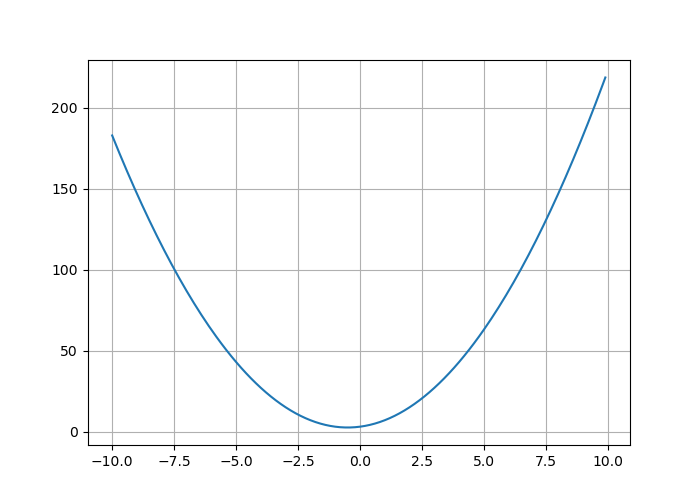

In [6]:
fig, axes = mplot.pyplot.subplots(figsize=(7, 5), nrows=1, ncols=1)

x = Tensor([i/10 for i in range(-100, 100, 1)])
y = target_func(x)

axes.plot(x, y)
mplot.pyplot.grid(b=True)

mplot.pyplot.show()

In [7]:
def estimate(e_params, x):
    exp = torch.arange(start=e_params.size()[0]-1, end=-1, step=-1)
    xp = torch.arange(start=e_params.size()[0]-1, end=-1, step=-1)
    x = x.unsqueeze(1)    
    return torch.sum(torch.pow(x, exp)*e_params, dim=1)
    

#### gradient descent method

1. select random params e of n dimensions
2. generate an estimate(e) as $\sum_{i=0}^{n} x^{i}*e(i)$
3. calculate error(e) = err(actual - estimate) (l1 or l2 loss)
4. calculate step = d error(e) wrt e
5. e = e - learning rate *step

In [36]:
degrees = 3
rng = torch.Generator()
rng.manual_seed(9898797)
est_params = torch.randn(degrees+1, generator=rng)*10
est_params = est_params.requires_grad_()
est_params

tensor([ -7.3338,  20.6363,   0.4278, -12.6650], requires_grad=True)

In [37]:
err_func = torch.nn.MSELoss()
learning_rate = math.pow(10, -degrees)

In [38]:
valid_x = Tensor([i/10 for i in range(-25, 25, 1)])
valid_y = target_func(valid_x)

<IPython.core.display.Javascript object>


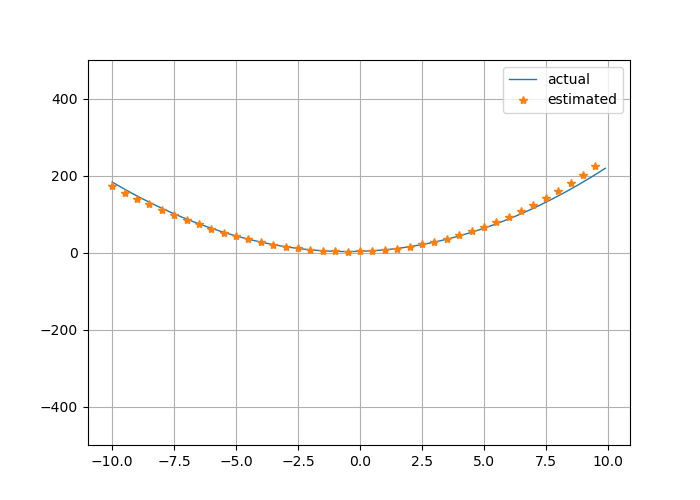

In [39]:
fig, axes = mplot.pyplot.subplots(figsize=(7, 5), nrows=1, ncols=1)

x = Tensor([i/10 for i in range(-100, 100, 1)])
y = target_func(x)

e_y = estimate(est_params.data, x[::5])

axes.set_ylim([-500, 500])

axes.plot(x, y, label='actual', linewidth=1)
plot1,  = axes.plot(x[::5], e_y, label='estimated', linestyle='', marker='*')
mplot.pyplot.grid(b=True)
mplot.pyplot.legend(['actual', 'estimated'])
mplot.pyplot.show()

In [40]:
step_sz = 1 + max(degrees - 2, 0)*10
next_update = step_sz
N = 200 + max(degrees - 2, 0)*5000
pbar = tqdm.notebook.tqdm(total=N, leave=False)

for i in range(0, N):
    est_y = estimate(est_params, valid_x)
    err = err_func(est_y, valid_y)
    err.backward()
    est_params.data = est_params.data - learning_rate*est_params.grad.data
    est_params.grad = None    
    
    pbar.update(1)
    
    if i >= next_update:
        e_y = estimate(est_params.data, x[::5])
        plot1.set_ydata(e_y)    
        fig.canvas.draw()
        fig.canvas.flush_events()
        time.sleep(0.05)
        
        next_update += step_sz
    
pbar.close()    
print(est_params.data, err.item())

  0%|          | 0/5200 [00:00<?, ?it/s]

tensor([0.0187, 2.0773, 1.9253, 2.7311]) 0.03358761966228485


In [41]:
num_params = func_params.size()[0]
num_params

3

<IPython.core.display.Javascript object>


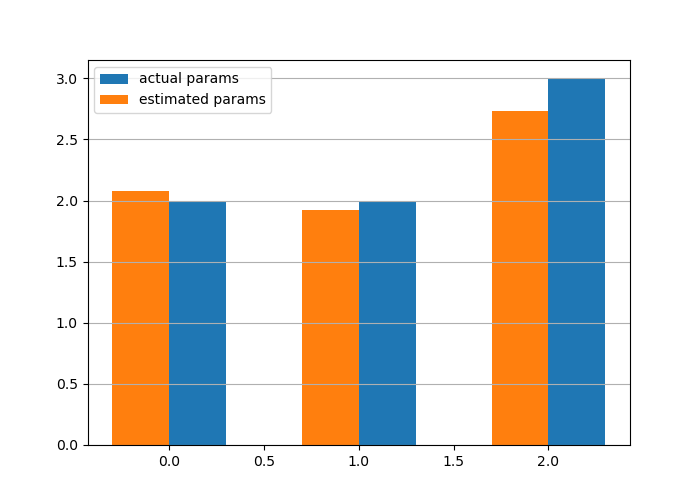

In [42]:
fig, axes = mplot.pyplot.subplots(figsize=(7, 5), nrows=1, ncols=1)

width = -0.3


axes.bar([i - width/2 for i in range(0, num_params, 1)], func_params.data, width=width)
if est_params.size()[0] >= num_params:
    axes.bar([i + width/2 for i in range(0, num_params, 1)], est_params.data[-3:], width=width)
else:
    est_p = torch.concat((torch.zeros(num_params - est_params.size()[0]), est_params.data))
    axes.bar([i + width/2 for i in range(0, num_params, 1)], est_p, width=width)
mplot.pyplot.grid(b=True, axis='y')
mplot.pyplot.legend(['actual params', 'estimated params'])
mplot.pyplot.show()